# Part I

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
from datetime import datetime
pd.reset_option('all')

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_1390/1985168221.py:6: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_1390/1985168221.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


## Visualize raw data

- score: number of upvotes minus number of downvotes
- link_id (for comments): id of the submission to which the comment responded

In [2]:
submissions_raw = pd.read_csv("self_i_raw_data/self_i_submissions.csv")
comments_raw = pd.read_csv("self_i_raw_data/self_i_comments.csv")

In [3]:
submissions_raw

,id,created,author,score,title,selftext,num_comments,link
0,70n85,2008-09-10 04:30,u/[deleted],1,A good site for sobriety help,NaN,0,https://www.reddit.com/r/selfimprovement/comme...
1,70n89,2008-09-10 04:30,u/[deleted],1,An excellent site for workout information,NaN,0,https://www.reddit.com/r/selfimprovement/comme...
2,72lyg,2008-09-21 00:29,u/d2kd3k,3,Trying to fit some workout into your schedule?...,NaN,0,https://www.reddit.com/r/selfimprovement/comme...
3,7p4xg,2009-01-12 09:07,u/kittenone,0,The time to get started is NOW!!!,NaN,1,https://www.reddit.com/r/selfimprovement/comme...
4,7pe80,2009-01-13 08:59,u/kittenone,1,Someday?,NaN,0,https://www.reddit.com/r/selfimprovement/comme...
...,...,...,...,...,...,...,...,...
185940,18vjhqe,2023-12-31 17:06,u/AnimeYumi,1,Sweets! 😩,"Pretty common problem I know, but seriously ho...",4,https://www.reddit.com/r/selfimprovement/comme...
185941,18vjnoo,2023-12-31 17:15,u/MLP-Badger,3,How can I make myself more attractive?,"So I’ve done physical training extensively, I’...",6,https://www.reddit.com/r/selfimprovement/comme...
185942,18vk1ez,2023-12-31 17:36,u/spiritual_payments,1,"Happy new year, how do I begin?","So idk but I just felt like complaining here, ...",0,https://www.reddit.com/r/selfimprovement/comme...
185943,18vk7c4,2023-12-31 17:45,u/_-_______K_______-_,1,Looking to the future with some hope and looki...,&#x200B;\n\nThis will be a bit of ag rant / lo...,2,https://www.reddit.com/r/selfimprovement/comme...


In [4]:
comments_raw

,id,link_id,created,author,score,body,link
0,c06zjsz,t3_7p4xg,2009-01-12 09:08,u/[deleted],1,[deleted],https://www.reddit.com/r/selfimprovement/comme...
1,c074ueq,t3_7qsxn,2009-01-19 07:11,u/[deleted],1,[deleted],https://www.reddit.com/r/selfimprovement/comme...
2,c076tjv,t3_7rgv5,2009-01-21 16:21,u/HolisticResources,1,Have you ever dreamed of becoming the presiden...,https://www.reddit.com/r/selfimprovement/comme...
3,c07ccc8,t3_7tae6,2009-01-29 02:50,u/[deleted],1,[deleted],https://www.reddit.com/r/selfimprovement/comme...
4,c07w5qr,t3_809sg,2009-02-25 16:17,u/kinkycat,1,"wow, great article",https://www.reddit.com/r/selfimprovement/comme...
...,...,...,...,...,...,...,...
1292471,kfrnglf,t3_18ve7f5,2023-12-31 17:49,u/throwaway_6835,2,God dammit bro I’m normally on the other end o...,https://www.reddit.com/r/selfimprovement/comme...
1292472,kfrnjdn,t3_18uxyio,2023-12-31 17:50,u/thosepinkclouds,1,I love DG,https://www.reddit.com/r/selfimprovement/comme...
1292473,kfrohp2,t3_18viiy7,2023-12-31 17:57,u/plytime18,1,I was the same. \n\nTrust me.\n\nWhen you are...,https://www.reddit.com/r/selfimprovement/comme...
1292474,kfrojp4,t3_18vjhqe,2023-12-31 17:57,u/AnimeYumi,1,Thank you for your input!\n\nI think fruits wi...,https://www.reddit.com/r/selfimprovement/comme...


### See distribution of raw data through years

In [5]:
#Extract year and month of publication

def extract_time(date_string):
    '''
    Extracts year and month of publication from the "created column
    
    Input:
        - date_string: date and hour of publication
        
    Returns:
        (tuple): year and date of publication'''
    date_object = datetime.strptime(date_string, "%Y-%m-%d %H:%M")

    return date_object.year, date_object.month

#Asked ChatGPT: "I have this function to retrieve year and date from a column in 
#pandas dataframe. How can I use it so two new columns can be added: year and date?"


submissions_raw[['year', 'month']] = submissions_raw['created'].apply\
                                           (lambda x: pd.Series(extract_time(x)))

comments_raw[['year', 'month']] = comments_raw['created'].apply\
                                           (lambda x: pd.Series(extract_time(x)))


In [6]:
year_counts_s = submissions_raw['year'].value_counts().sort_index()
year_counts_c = comments_raw['year'].value_counts().sort_index()

year_counts_s

year
2008        3
2009      201
2010       48
2011       30
2012     2353
2013     3735
2014     2667
2015     2904
2016     3604
2017     5363
2018    10501
2019    17363
2020    25171
2021    30994
2022    35451
2023    45557
Name: count, dtype: int64

In [7]:
year_counts_c

year
2009        44
2010         3
2011        11
2012      1708
2013      5164
2014     12365
2015     20418
2016     24434
2017     35882
2018     68974
2019    105313
2020    137785
2021    222350
2022    286386
2023    371639
Name: count, dtype: int64

Check parsing issue of submission '17ih1ms'

In [8]:
submissions_raw[submissions_raw.id == '17ih1ms']

,id,created,author,score,title,selftext,num_comments,link,year,month
177932,17ih1ms,2023-10-28 11:11,u/Amarylis9,1,Working/studying 70 hours for 2 years: doable?,\rI am a 26 years old woman and have an associ...,3,https://www.reddit.com/r/selfimprovement/comme...,2023,10


Still good here

## Data Wrangling

### Remove missing values

In [10]:
def remove_missing_data(raw_df, column):
    '''
    Filters all entries that have [removed] or [deleted] in their body/self 
    text column (as applicable). Also filters NaN values.
    
    Input: 
        - raw_df: Pandas dataframe
        - column: Target column to look for missing values
    
    Returns:
        - Cleaned dataframe
    '''

    print("DataFrame shape before cleaning:", raw_df.shape)

    #Remove rows with values of "[removed]" or "[deleted]" on body/self text
    to_filter = ["[removed]", "[deleted]", "\[deleted\]"]
    mask = ~raw_df[column].isin(to_filter)
    filtered_df = raw_df[mask]

    print("DataFrame shape after filtering removed values:", 
                                                 filtered_df.shape)
    
    #Filter NaN
    filtered_df = filtered_df.dropna(subset=[column])
    print("DataFrame shape after filtering NaN values:", filtered_df.shape)

    return filtered_df

In [11]:
submissions_filtered = remove_missing_data(submissions_raw, "selftext")
submissions_filtered

DataFrame shape before cleaning: (185945, 10)
DataFrame shape after filtering removed values: (125236, 10)
DataFrame shape after filtering NaN values: (118309, 10)


,id,created,author,score,title,selftext,num_comments,link,year,month
97,8w6db,2009-06-27 07:48,u/thenewhustle,0,Free Ebooks,The Master Key System\nAs a Man Thinketh\nThe ...,0,https://www.reddit.com/r/selfimprovement/comme...,2009,6
99,8wd8w,2009-06-28 06:30,u/thenewhustle,0,How To Embrace Failure To Empower Your Future,A very powerful message on how to get back up ...,0,https://www.reddit.com/r/selfimprovement/comme...,2009,6
142,97m4m,2009-08-04 21:37,u/hivetyrant,1,Self Confidence: The Strength We All Have,"Do you have a strong voice, or a well-built fr...",0,https://www.reddit.com/r/selfimprovement/comme...,2009,8
188,a35f5,2009-11-11 01:05,u/mike-l,1,Flight of the Feathered Serpent Book Trailer,Trailer for an amazing book published decades ...,1,https://www.reddit.com/r/selfimprovement/comme...,2009,11
262,hk5r2,2011-05-25 17:27,u/[deleted],1,What cures absentmindedness?,I had an appointment today with the dentist. O...,3,https://www.reddit.com/r/selfimprovement/comme...,2011,5
...,...,...,...,...,...,...,...,...,...,...
185939,18vjbh2,2023-12-31 16:57,u/oxarep,2,Is it possible to learn all those things?,"Hi, im a teenager and im starving for knowlodg...",6,https://www.reddit.com/r/selfimprovement/comme...,2023,12
185940,18vjhqe,2023-12-31 17:06,u/AnimeYumi,1,Sweets! 😩,"Pretty common problem I know, but seriously ho...",4,https://www.reddit.com/r/selfimprovement/comme...,2023,12
185941,18vjnoo,2023-12-31 17:15,u/MLP-Badger,3,How can I make myself more attractive?,"So I’ve done physical training extensively, I’...",6,https://www.reddit.com/r/selfimprovement/comme...,2023,12
185942,18vk1ez,2023-12-31 17:36,u/spiritual_payments,1,"Happy new year, how do I begin?","So idk but I just felt like complaining here, ...",0,https://www.reddit.com/r/selfimprovement/comme...,2023,12


In [12]:
comments_filtered = remove_missing_data(comments_raw, "body")
comments_filtered

DataFrame shape before cleaning: (1292476, 9)
DataFrame shape after filtering removed values: (1186139, 9)
DataFrame shape after filtering NaN values: (1186117, 9)


,id,link_id,created,author,score,body,link,year,month
2,c076tjv,t3_7rgv5,2009-01-21 16:21,u/HolisticResources,1,Have you ever dreamed of becoming the presiden...,https://www.reddit.com/r/selfimprovement/comme...,2009,1
4,c07w5qr,t3_809sg,2009-02-25 16:17,u/kinkycat,1,"wow, great article",https://www.reddit.com/r/selfimprovement/comme...,2009,2
7,c0a117d,t3_8pjlk,2009-06-03 14:18,u/robinbal,1,Break up your goals into small bite size piece...,https://www.reddit.com/r/selfimprovement/comme...,2009,6
8,c0a1rqj,t3_8pjlk,2009-06-04 09:52,u/marvin566,1,Good advice: Most goals from new years resolut...,https://www.reddit.com/r/selfimprovement/comme...,2009,6
9,c0a43vx,t3_8qhqj,2009-06-07 09:43,u/robinbal,2,Check against everything you do in a regular d...,https://www.reddit.com/r/selfimprovement/comme...,2009,6
...,...,...,...,...,...,...,...,...,...
1292471,kfrnglf,t3_18ve7f5,2023-12-31 17:49,u/throwaway_6835,2,God dammit bro I’m normally on the other end o...,https://www.reddit.com/r/selfimprovement/comme...,2023,12
1292472,kfrnjdn,t3_18uxyio,2023-12-31 17:50,u/thosepinkclouds,1,I love DG,https://www.reddit.com/r/selfimprovement/comme...,2023,12
1292473,kfrohp2,t3_18viiy7,2023-12-31 17:57,u/plytime18,1,I was the same. \n\nTrust me.\n\nWhen you are...,https://www.reddit.com/r/selfimprovement/comme...,2023,12
1292474,kfrojp4,t3_18vjhqe,2023-12-31 17:57,u/AnimeYumi,1,Thank you for your input!\n\nI think fruits wi...,https://www.reddit.com/r/selfimprovement/comme...,2023,12


Check parsing issue

In [13]:
submissions_filtered[submissions_filtered.id == '17ih1ms']

,id,created,author,score,title,selftext,num_comments,link,year,month
177932,17ih1ms,2023-10-28 11:11,u/Amarylis9,1,Working/studying 70 hours for 2 years: doable?,\rI am a 26 years old woman and have an associ...,3,https://www.reddit.com/r/selfimprovement/comme...,2023,10


Still good

### Duplicates

In [14]:
submissions_deduplicated = submissions_filtered.drop_duplicates(subset=['selftext'])
comments_deduplicated = comments_filtered.drop_duplicates(subset=['body'])

Check parsing issue

In [15]:
submissions_deduplicated[submissions_deduplicated.id == '17ih1ms']

,id,created,author,score,title,selftext,num_comments,link,year,month
177932,17ih1ms,2023-10-28 11:11,u/Amarylis9,1,Working/studying 70 hours for 2 years: doable?,\rI am a 26 years old woman and have an associ...,3,https://www.reddit.com/r/selfimprovement/comme...,2023,10


Still good

### Clean text from "selftext" (submissions) and "body" (comments) columns

In [16]:
#https://www.w3schools.com/python/ref_string_translate.asp
#https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string

def clean_text(s):
    '''
    Cleans text
    
        Inputs:
            - s (string)
            
        Returns:
            - cleaned string
    '''

    #Remove links
    text = re.sub(r'http\S+|www\S+', '', s)

    #Removes punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    #Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    #Remove line breaks
    text = text.replace('\n', ' ').replace('\r', ' ')

    #Lowercase
    text = text.lower()

    #Remove unnecesary whitespace
    return text.strip()
    
submissions_deduplicated["cleaned_text"] = submissions_deduplicated["selftext"].apply(lambda x: clean_text(x))
comments_deduplicated["cleaned_text"] = comments_deduplicated["body"].apply(lambda x: clean_text(x))

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_1390/541077975.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submissions_deduplicated["cleaned_text"] = submissions_deduplicated["selftext"].apply(lambda x: clean_text(x))
/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_1390/541077975.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_deduplicated["cleaned_text"] = comments_deduplicated["body"].apply(lambda x: clean_text(x))


Check parsing issue

In [17]:
submissions_deduplicated[submissions_deduplicated.id == '17ih1ms']

,id,created,author,score,title,selftext,num_comments,link,year,month,cleaned_text
177932,17ih1ms,2023-10-28 11:11,u/Amarylis9,1,Working/studying 70 hours for 2 years: doable?,\rI am a 26 years old woman and have an associ...,3,https://www.reddit.com/r/selfimprovement/comme...,2023,10,i am a 26 years old woman and have an associat...


In [19]:
#Closer look
with pd.option_context('display.max_colwidth', None):
    display(submissions_deduplicated[submissions_deduplicated.id == '17ih1ms'][["cleaned_text"]])
    display(submissions_deduplicated[submissions_deduplicated.id == '17ih1ms'][["selftext"]])

,cleaned_text
177932,i am a 26 years old woman and have an associate degree and would like to go for my bachelor in 2 years this means workingstudying 70 hours a week for 2 years will this be doable or would you spread this out to 4 years how is this for your health any advice


,selftext
177932,\rI am a 26 years old woman and have an associate degree and would like to go for my bachelor in 2 years. This means working/studying 70 hours a week for 2 years. Will this be doable? Or would you spread this out to 4 years? How is this for your health? Any advice?


Still good here

### Delete very short texts

In [20]:
#Create column with word count to identify short texts
submissions_deduplicated['word_count'] = submissions_deduplicated['cleaned_text'].apply(lambda x: len(x.split()))
comments_deduplicated['word_count'] = comments_deduplicated['cleaned_text'].apply(lambda x: len(x.split()))

#Delete very short texts
print("Submissions shape before dropping short texts:", submissions_deduplicated.shape)
submissions_cleaned = submissions_deduplicated[submissions_deduplicated.word_count >= 50]
print("Submissions shape after dropping short texts:", submissions_cleaned.shape)

print("Comments shape before dropping short texts:", comments_deduplicated.shape)
comments_cleaned = comments_deduplicated[comments_deduplicated.word_count >= 50]
print("Comments shape after dropping short texts:", comments_cleaned.shape)

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_1390/1992859432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submissions_deduplicated['word_count'] = submissions_deduplicated['cleaned_text'].apply(lambda x: len(x.split()))


Submissions shape before dropping short texts: (117488, 12)
Submissions shape after dropping short texts: (98022, 12)
Comments shape before dropping short texts: (1097545, 11)
Comments shape after dropping short texts: (409588, 11)


/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_1390/1992859432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_deduplicated['word_count'] = comments_deduplicated['cleaned_text'].apply(lambda x: len(x.split()))


Check parsing issue

In [21]:
submissions_deduplicated[submissions_deduplicated.id == '17ih1ms']

,id,created,author,score,title,selftext,num_comments,link,year,month,cleaned_text,word_count
177932,17ih1ms,2023-10-28 11:11,u/Amarylis9,1,Working/studying 70 hours for 2 years: doable?,\rI am a 26 years old woman and have an associ...,3,https://www.reddit.com/r/selfimprovement/comme...,2023,10,i am a 26 years old woman and have an associat...,54


In [22]:
submissions_cleaned[submissions_cleaned.id == '17ih1ms']

,id,created,author,score,title,selftext,num_comments,link,year,month,cleaned_text,word_count
177932,17ih1ms,2023-10-28 11:11,u/Amarylis9,1,Working/studying 70 hours for 2 years: doable?,\rI am a 26 years old woman and have an associ...,3,https://www.reddit.com/r/selfimprovement/comme...,2023,10,i am a 26 years old woman and have an associat...,54


Still good

### Delete strange entries

In [24]:
def filters_df(input_df, column, to_remove):
    '''
    Filters DataFrame based on given values

    Input:
        - input_df
        - column: column to search given values
        - to_remove (list): values to remove

    Output: 
        Filtered df
    '''

    mask = ~input_df[column].isin(to_remove)
    filtered_df = input_df[mask]

    #Check for deleted rows

    num_rows_before = input_df.shape[0]
    num_rows_after = filtered_df.shape[0]

    print("{} rows deleted. {} rows left".format((num_rows_before - num_rows_after), num_rows_after) )
    
    return filtered_df

to_delete = ['jwe64x5', 'kewe7tm', 'jcaxhqr', 'jpyh00t']

submissions_cleaned = filters_df(submissions_cleaned, 'id', to_delete)
comments_cleaned = filters_df(comments_cleaned, 'id', to_delete)

0 rows deleted. 98022 rows left
0 rows deleted. 409585 rows left


Check parsing issue

In [25]:
submissions_cleaned[submissions_cleaned.id == '17ih1ms']

,id,created,author,score,title,selftext,num_comments,link,year,month,cleaned_text,word_count
177932,17ih1ms,2023-10-28 11:11,u/Amarylis9,1,Working/studying 70 hours for 2 years: doable?,\rI am a 26 years old woman and have an associ...,3,https://www.reddit.com/r/selfimprovement/comme...,2023,10,i am a 26 years old woman and have an associat...,54


Still good

### Extract link ids from comments

In [38]:
# First, transform link_id from comments data to match submissions´s ids

def extract_link_id(link_id):
    ''''''
    try:
        pattern = r't3_(.*)'
        match = re.search(pattern, link_id)
        result = match.group(1)
    except:
        return None
    
    return result 

comments_cleaned["extracted_link_id"] = comments_filtered['link_id'].\
                                                  apply(extract_link_id)

In [18]:
#Preview
comments_cleaned

,id,link_id,created,author,score,body,link,year,month,cleaned_text,word_count,extracted_link_id
22,c0b1s1q,t3_90qg5,2009-07-13 13:45,u/marvin566,1,It would all work so much better if as childre...,https://www.reddit.com/r/selfimprovement/comme...,2009,7,it would all work so much better if as childre...,55,90qg5
41,c0fo3f6,t3_a35f5,2009-11-11 19:12,u/gmkaake,0,Thanks for the link - that was an inspiring tr...,https://www.reddit.com/r/selfimprovement/comme...,2009,11,thanks for the link that was an inspiring tra...,52,a35f5
51,c1k7xxv,t3_g0tuo,2011-03-10 15:54,u/xalelexx,1,"I frequent GM, read it there soon after it was...",https://www.reddit.com/r/selfimprovement/comme...,2011,3,i frequent gm read it there soon after it was ...,57,g0tuo
59,c3p1o6p,t3_pfyz0,2012-02-08 01:14,u/aeoz,2,Here's a summarised list:\n\n* How To Win Frie...,https://www.reddit.com/r/selfimprovement/comme...,2012,2,heres a summarised list how to win friends a...,139,pfyz0
68,c3sbl0o,t3_pfzt5,2012-02-17 15:59,u/robsclone,1,nice job! Just had the idea to type this and ...,https://www.reddit.com/r/selfimprovement/comme...,2012,2,nice job just had the idea to type this and t...,86,pfzt5
...,...,...,...,...,...,...,...,...,...,...,...,...
1292456,kfrj0t8,t3_18v4lhr,2023-12-31 17:18,u/FastNovel7497,1,"Be prepared, someday you’re gonna die no matte...",https://www.reddit.com/r/selfimprovement/comme...,2023,12,be prepared someday youre gonna die no matter ...,314,18v4lhr
1292466,kfrmtn3,t3_18rb2vj,2023-12-31 17:45,u/eggbunyo,1,"grow up, if you think external validation is h...",https://www.reddit.com/r/selfimprovement/comme...,2023,12,grow up if you think external validation is ho...,68,18rb2vj
1292470,kfrndk0,t3_18rb2vj,2023-12-31 17:49,u/eggbunyo,1,don’t you think it’s convenient that you’ve c...,https://www.reddit.com/r/selfimprovement/comme...,2023,12,dont you think its convenient that youve conv...,61,18rb2vj
1292473,kfrohp2,t3_18viiy7,2023-12-31 17:57,u/plytime18,1,I was the same. \n\nTrust me.\n\nWhen you are...,https://www.reddit.com/r/selfimprovement/comme...,2023,12,i was the same trust me when you are older...,91,18viiy7


### Create column to identity submissions or comments later (after combining them)

In [37]:
submissions_cleaned["type"] = "submission"
comments_cleaned["type"] = "comment"

Check parsing issue

In [26]:
submissions_cleaned[submissions_cleaned.id == '17ih1ms']

,id,created,author,score,title,selftext,num_comments,link,year,month,cleaned_text,word_count
177932,17ih1ms,2023-10-28 11:11,u/Amarylis9,1,Working/studying 70 hours for 2 years: doable?,\rI am a 26 years old woman and have an associ...,3,https://www.reddit.com/r/selfimprovement/comme...,2023,10,i am a 26 years old woman and have an associat...,54


## Exploratory Data Analysis of cleaned data

### See Average lenght of texts

**Submissions**

Average number of words: 247.3930750239742


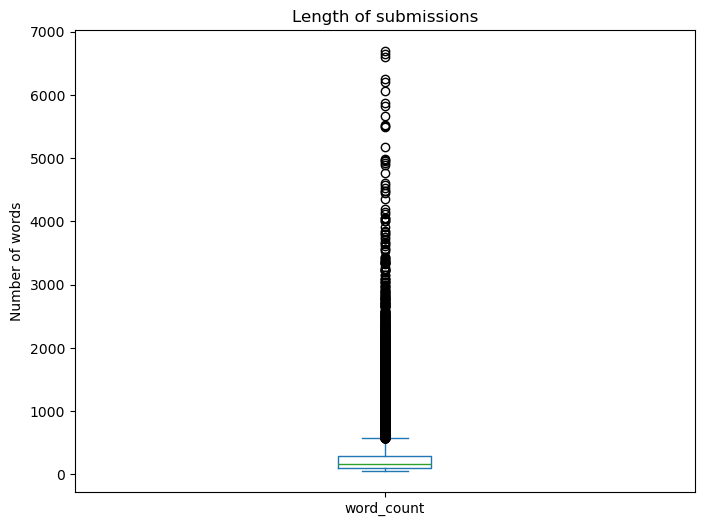

In [27]:
# Average submissions
average_length_submissions = submissions_cleaned['word_count'].mean()
print(f"Average number of words: {average_length_submissions}")

# Create a boxplot of the word counts
plt.figure(figsize=(8, 6))
submissions_cleaned["word_count"].plot(kind='box')
plt.title('Length of submissions')
plt.ylabel('Number of words')
plt.show()

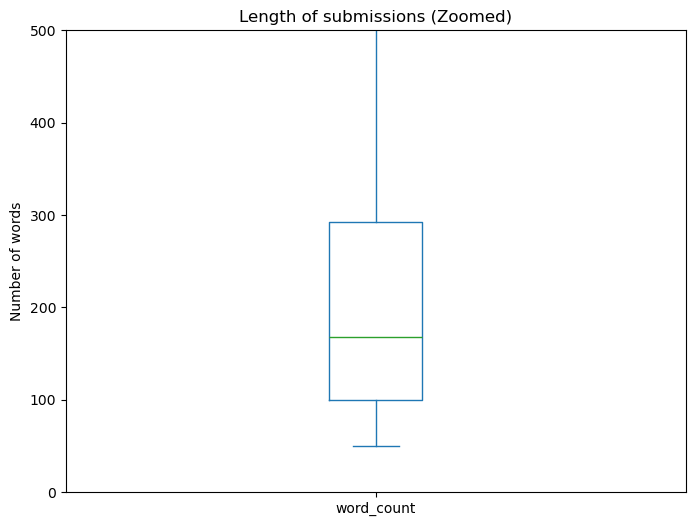

In [28]:
# Take a closer look
plt.figure(figsize=(8, 6))
submissions_cleaned["word_count"].plot(kind='box')
plt.title('Length of submissions (Zoomed)')
plt.ylabel('Number of words')
plt.ylim(0, 500)  
plt.show()

**Comments**

Average number of words: 136.52711158855917


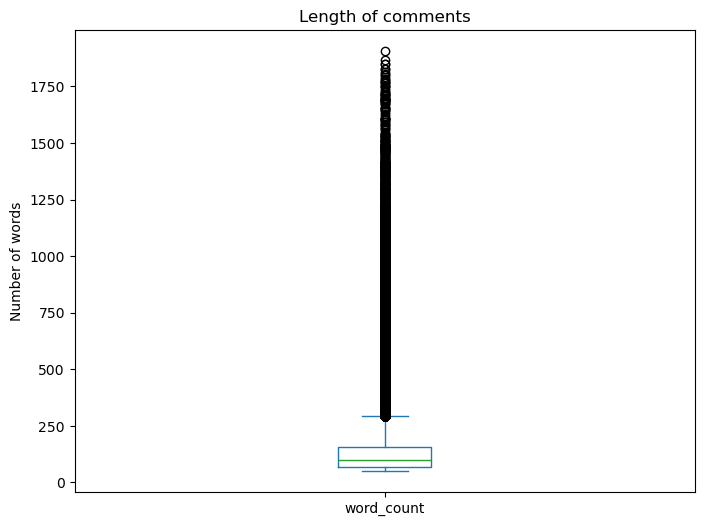

In [29]:
# Average comments
average_length_comments = comments_cleaned['word_count'].mean()
print(f"Average number of words: {average_length_comments}")

# Create a boxplot of the word counts
plt.figure(figsize=(8, 6))
comments_cleaned["word_count"].plot(kind='box')
plt.title('Length of comments')
plt.ylabel('Number of words')
plt.show()

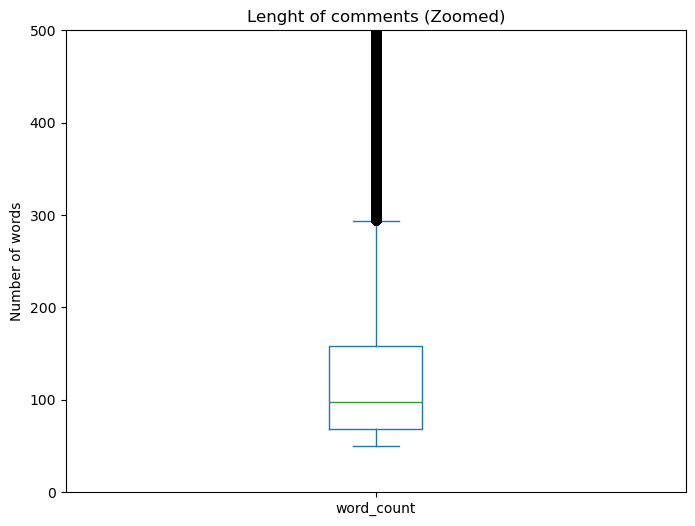

In [30]:
# Take a closer look
plt.figure(figsize=(8, 6))
comments_cleaned["word_count"].plot(kind='box')
plt.title('Lenght of comments (Zoomed)')
plt.ylabel('Number of words')
plt.ylim(0, 500)  
plt.show()

### Observe distribution of volume of publications throughout the years, after cleaning

In [45]:
#Combine two df 
submissions_ready = submissions_cleaned.rename(columns={'selftext': 'body'}, inplace=False)
all_data = pd.concat([submissions_ready, comments_cleaned], ignore_index=True)

all_data.reset_index()

,index,id,created,author,score,title,body,num_comments,link,year,month,cleaned_text,word_count,type,link_id,extracted_link_id
0,0,hk5r2,2011-05-25 17:27,u/[deleted],1,What cures absentmindedness?,I had an appointment today with the dentist. O...,3.0,https://www.reddit.com/r/selfimprovement/comme...,2011,5,i had an appointment today with the dentist ov...,65,submission,NaN,NaN
1,1,iqimz,2011-07-15 11:15,u/dustinsmusings,3,Do you use affirmations to improve your thinki...,"I created this site several months ago, and I ...",0.0,https://www.reddit.com/r/selfimprovement/comme...,2011,7,i created this site several months ago and i s...,116,submission,NaN,NaN
2,2,pfzt5,2012-02-08 01:40,u/aeoz,6,Announcement.,Hello everyone.\n\nI have recently took over t...,4.0,https://www.reddit.com/r/selfimprovement/comme...,2012,2,hello everyone i have recently took over this...,194,submission,NaN,NaN
3,3,pk714,2012-02-10 19:16,u/[deleted],1,Love yourself or you'll lose yourself.,"I grew up with body dysmorphia, eating disorde...",0.0,https://www.reddit.com/r/selfimprovement/comme...,2012,2,i grew up with body dysmorphia eating disorder...,583,submission,NaN,NaN
4,4,q0q8x,2012-02-22 03:24,u/[deleted],1,"So far along, so far yet to go.",I have to ask- when do you get to a point wher...,0.0,https://www.reddit.com/r/selfimprovement/comme...,2012,2,i have to ask when do you get to a point where...,558,submission,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507602,507602,kfrj0t8,2023-12-31 17:18,u/FastNovel7497,1,NaN,"Be prepared, someday you’re gonna die no matte...",NaN,https://www.reddit.com/r/selfimprovement/comme...,2023,12,be prepared someday youre gonna die no matter ...,314,comment,t3_18v4lhr,18v4lhr
507603,507603,kfrmtn3,2023-12-31 17:45,u/eggbunyo,1,NaN,"grow up, if you think external validation is h...",NaN,https://www.reddit.com/r/selfimprovement/comme...,2023,12,grow up if you think external validation is ho...,68,comment,t3_18rb2vj,18rb2vj
507604,507604,kfrndk0,2023-12-31 17:49,u/eggbunyo,1,NaN,don’t you think it’s convenient that you’ve c...,NaN,https://www.reddit.com/r/selfimprovement/comme...,2023,12,dont you think its convenient that youve conv...,61,comment,t3_18rb2vj,18rb2vj
507605,507605,kfrohp2,2023-12-31 17:57,u/plytime18,1,NaN,I was the same. \n\nTrust me.\n\nWhen you are...,NaN,https://www.reddit.com/r/selfimprovement/comme...,2023,12,i was the same trust me when you are older...,91,comment,t3_18viiy7,18viiy7


Check parsing issue

In [49]:
submissions_ready[submissions_ready.id == '17ih1ms']

,id,created,author,score,title,body,num_comments,link,year,month,cleaned_text,word_count,type
177932,17ih1ms,2023-10-28 11:11,u/Amarylis9,1,Working/studying 70 hours for 2 years: doable?,\rI am a 26 years old woman and have an associ...,3,https://www.reddit.com/r/selfimprovement/comme...,2023,10,i am a 26 years old woman and have an associat...,54,submission


In [50]:
all_data[all_data.id == '17ih1ms']

,id,created,author,score,title,body,num_comments,link,year,month,cleaned_text,word_count,type,link_id,extracted_link_id
92279,17ih1ms,2023-10-28 11:11,u/Amarylis9,1,Working/studying 70 hours for 2 years: doable?,\rI am a 26 years old woman and have an associ...,3.0,https://www.reddit.com/r/selfimprovement/comme...,2023,10,i am a 26 years old woman and have an associat...,54,submission,NaN,NaN


Still good

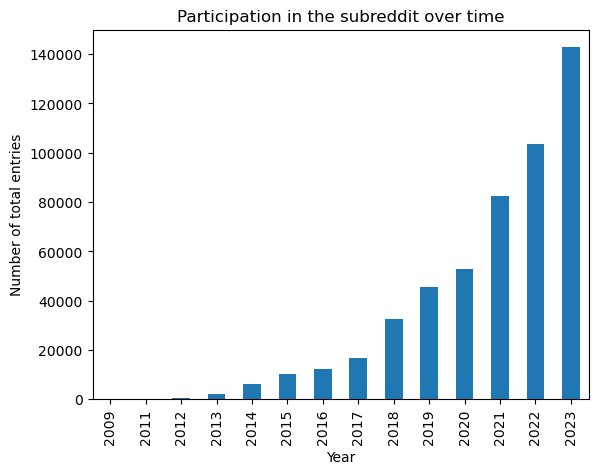

In [51]:
year_counts = all_data['year'].value_counts().sort_index()

year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of total entries')
plt.title('Participation in the subreddit over time')
plt.show()

### Observe number of participants in the forum

In [52]:
authors = all_data["author"]
print("{} unique authors".format(len(set(authors))))


166797 unique authors


## Export final df

In [53]:
#Data for topic model

all_data.reset_index(inplace=True)

final_df = all_data[["type", "id", "extracted_link_id", "author", "year", 
                       "month", "body", "cleaned_text", "score",
                       "num_comments"]]


final_df.to_csv('all_data_cleaned.csv')

final_df2 = all_data[["type", "id", "extracted_link_id", "author", "year", 
                       "month", "cleaned_text", "score",
                       "num_comments"]]


final_df2.to_csv('data_topicmodel.csv')

In [28]:
final_df

,type,id,extracted_link_id,author,year,month,body,cleaned_text,score,num_comments
0,submission,hk5r2,NaN,u/[deleted],2011,5,I had an appointment today with the dentist. O...,i had an appointment today with the dentist ov...,1,3.0
1,submission,iqimz,NaN,u/dustinsmusings,2011,7,"I created this site several months ago, and I ...",i created this site several months ago and i s...,3,0.0
2,submission,pfzt5,NaN,u/aeoz,2012,2,Hello everyone.\n\nI have recently took over t...,hello everyone i have recently took over this...,6,4.0
3,submission,pk714,NaN,u/[deleted],2012,2,"I grew up with body dysmorphia, eating disorde...",i grew up with body dysmorphia eating disorder...,1,0.0
4,submission,q0q8x,NaN,u/[deleted],2012,2,I have to ask- when do you get to a point wher...,i have to ask when do you get to a point where...,1,0.0
...,...,...,...,...,...,...,...,...,...,...
507602,comment,kfrj0t8,18v4lhr,u/FastNovel7497,2023,12,"Be prepared, someday you’re gonna die no matte...",be prepared someday youre gonna die no matter ...,1,NaN
507603,comment,kfrmtn3,18rb2vj,u/eggbunyo,2023,12,"grow up, if you think external validation is h...",grow up if you think external validation is ho...,1,NaN
507604,comment,kfrndk0,18rb2vj,u/eggbunyo,2023,12,don’t you think it’s convenient that you’ve c...,dont you think its convenient that youve conv...,1,NaN
507605,comment,kfrohp2,18viiy7,u/plytime18,2023,12,I was the same. \n\nTrust me.\n\nWhen you are...,i was the same trust me when you are older...,1,NaN


In [29]:
final_df2

,type,id,extracted_link_id,author,year,month,cleaned_text,score,num_comments
0,submission,hk5r2,NaN,u/[deleted],2011,5,i had an appointment today with the dentist ov...,1,3.0
1,submission,iqimz,NaN,u/dustinsmusings,2011,7,i created this site several months ago and i s...,3,0.0
2,submission,pfzt5,NaN,u/aeoz,2012,2,hello everyone i have recently took over this...,6,4.0
3,submission,pk714,NaN,u/[deleted],2012,2,i grew up with body dysmorphia eating disorder...,1,0.0
4,submission,q0q8x,NaN,u/[deleted],2012,2,i have to ask when do you get to a point where...,1,0.0
...,...,...,...,...,...,...,...,...,...
507602,comment,kfrj0t8,18v4lhr,u/FastNovel7497,2023,12,be prepared someday youre gonna die no matter ...,1,NaN
507603,comment,kfrmtn3,18rb2vj,u/eggbunyo,2023,12,grow up if you think external validation is ho...,1,NaN
507604,comment,kfrndk0,18rb2vj,u/eggbunyo,2023,12,dont you think its convenient that youve conv...,1,NaN
507605,comment,kfrohp2,18viiy7,u/plytime18,2023,12,i was the same trust me when you are older...,1,NaN


Check parsing issue

In [58]:
with pd.option_context('display.max_colwidth', None):
    display(final_df[final_df.id == '17ih1ms'])

,type,id,extracted_link_id,author,year,month,body,cleaned_text,score,num_comments
92279,submission,17ih1ms,NaN,u/Amarylis9,2023,10,\rI am a 26 years old woman and have an associate degree and would like to go for my bachelor in 2 years. This means working/studying 70 hours a week for 2 years. Will this be doable? Or would you spread this out to 4 years? How is this for your health? Any advice?,i am a 26 years old woman and have an associate degree and would like to go for my bachelor in 2 years this means workingstudying 70 hours a week for 2 years will this be doable or would you spread this out to 4 years how is this for your health any advice,1,3.0


Still good. Problem needs to be in the process of saving/opening the csv file

Already checked the csv file (outside of pandas, like a normal csv) and it has the problem. Problem is on the saving part.

# Part II

Create new csv without unnecessary columns, after csv was passed through LIWC software

In [32]:
liwc_results = pd.read_csv("moral_scores.csv")

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_3855/650279132.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  liwc_results = pd.read_csv("moral_scores.csv")


In [33]:
liwc_results.columns

Index(['Unnamed: 0', 'type', 'id', 'extracted_link_id', 'author', 'year',
       'month', 'body', 'cleaned_text', 'score', 'num_comments', 'Segment',
       'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'moral'],
      dtype='object')

In [34]:
final_liwc_results = liwc_results.drop(['Unnamed: 0', 'body','Segment'], axis=1)

In [35]:
final_liwc_results.columns

Index(['type', 'id', 'extracted_link_id', 'author', 'year', 'month',
       'cleaned_text', 'score', 'num_comments', 'emo_pos', 'emo_neg',
       'emo_anx', 'emo_anger', 'emo_sad', 'moral'],
      dtype='object')

In [36]:
final_liwc_results.to_csv('self_i_cleaned_data/cleaned_moral_scores.csv')

In [37]:
final_liwc_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507609 entries, 0 to 507608
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   type               507609 non-null  object 
 1   id                 507609 non-null  object 
 2   extracted_link_id  409586 non-null  object 
 3   author             507607 non-null  object 
 4   year               507607 non-null  float64
 5   month              507607 non-null  float64
 6   cleaned_text       507605 non-null  object 
 7   score              507605 non-null  float64
 8   num_comments       98021 non-null   float64
 9   emo_pos            507606 non-null  float64
 10  emo_neg            507606 non-null  float64
 11  emo_anx            507606 non-null  float64
 12  emo_anger          507606 non-null  float64
 13  emo_sad            507606 non-null  float64
 14  moral              507606 non-null  float64
dtypes: float64(10), object(5)
memory usage: 58.1+ MB
